In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

#Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# DATA 3450 Project
Group 1: Chuan Yong Guo, Sijia Hao, Prajesh Patel

### Insurance Costs In America

One of the primary concern many Americans face today with respect to their health is the cost of health insurance. The cost of health insurance varies from person to person, and is affected by multiple factors. The average citizen living in the United States of America can expect to pay around $456 - $1152 per month for health insurance. The cost of health insurance is affected by a number of demographics, such as a person's age, location, tobacco usage, and whether they have a family of not. The purpose of this project is to determine if a person's demographics can be used to predict the cost of health insurance. The predicted cost of health insurance can be used as one indication of the person's overall health. The question we aim to answer is: What do our demographics tell us about our health?

Source 1: https://www.valuepenguin.com/average-cost-of-health-insurance

Source 2: https://www.ehealthinsurance.com/resources/individual-and-family/how-much-does-individual-health-insurance-cost#:~:text=BY%20Anna%20Porretta%20Updated%20on%20October%2001%2C%202022&text=In%202020%2C%20the%20average%20national,wide%20selection%20of%20health%20plans.

### Explanatory Data Analysis

In order to predict insurance charges, we will be using a dataset with demographic features for American citizens to create a predictive model. Below details the step by step procedure of explanatory data analysis performed to prepare the dataset for modelling. 
1. Convert features into correct datatypes for processing. 
2. Visualize distributions of numerical features to identify outliers. 
3. Check for collinearity between numerical feature using a correlation matrix.
4. Visualize distribution of categorical features to identify outliers. 
5. Use One-Hot Encoding to transform categorical features. 
6. Split the dataset into training data and test data. 
7. Create a predictive model using the training data and test the effectiveness of the model using the test data. 
8. Interpret results obtained from the modelling. 

In [2]:
#Import dataset
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1: Convert features into correct datatypes for processing. 

In [3]:
#Obtain some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Convert categorical variables from object datatype to category datatype
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')
df['children'] = df['children'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.4 KB


The features 'sex', 'smoker', and 'region' are categorical features, so they are converted from object datatype to category datatype for processing. 

The feature 'children' also needs to be converted into a category datatype because it is also a categorical feature, this is logical because it is impossible to have half a child.

## 2. Visualize distributions of numerical features to identify outliers. 

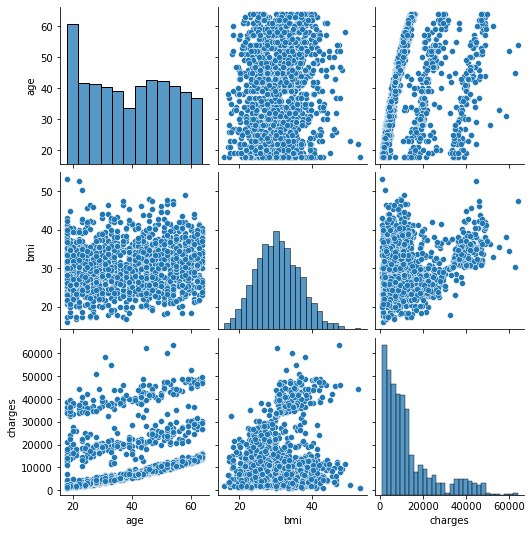

In [5]:
#Visualize pairplot
sns.pairplot(df)

In [10]:
df.describe()

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,0.494768,0.505232,0.428999,0.242152,0.179372,0.117339,0.018685,0.013453,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,12110.011237,0.500160,0.500160,0.495118,0.428546,0.383807,0.321945,0.135459,0.115247,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,9382.033000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on the pairplot and histograms of numerical features, there doesn't appear to be any notable outliers that should be dropped for 'age' and 'bmi'. The feature 'age' closely follows an uniform distribution with a range of 18-64 years old. This is good because it means out dataset has a good representation for all ages of adults. The feature 'bmi' follows a normal distribution, which is a good indication that our dataset is a good sample of a normal population. The feature 'charges' follows a log normal distribution, based on the pairplots there appears to be some outliers of 'charges' exceeding $60000, these outliers can be dropped to potentially improve modelling. 

<AxesSubplot:xlabel='children', ylabel='count'>

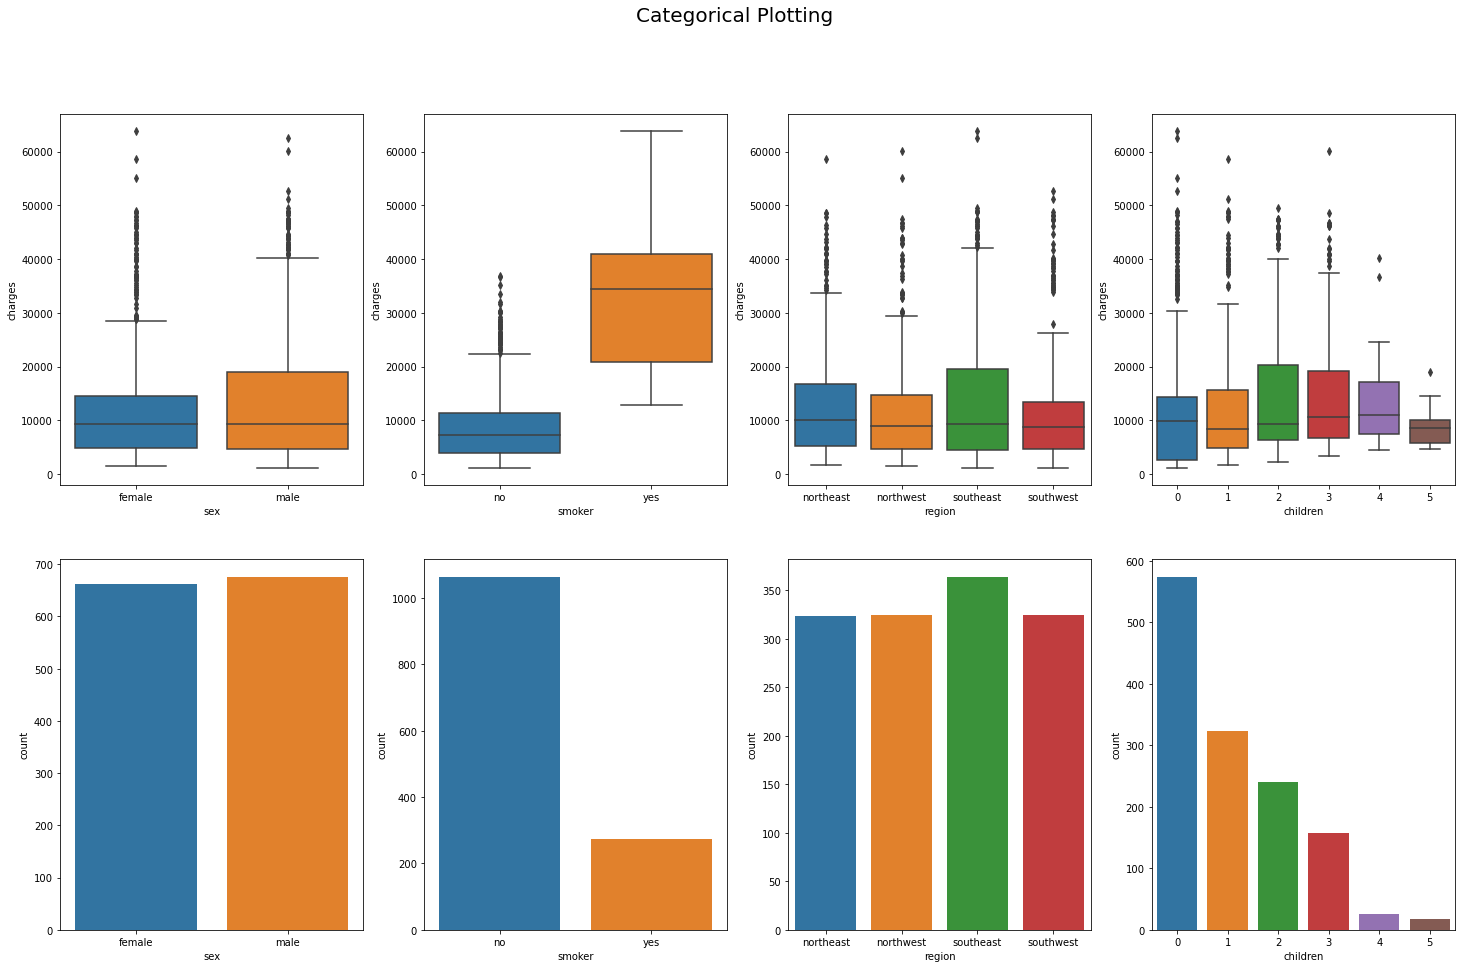

In [6]:
#Print boxplots
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(25,15))
fig.suptitle("Categorical Plotting", fontsize=20)
sns.boxplot(x="sex", y="charges", data=df,ax=ax[0,0])
sns.boxplot(x="smoker", y="charges", data=df,ax=ax[0,1])
sns.boxplot(x="region", y="charges", data=df,ax=ax[0,2])
sns.boxplot(x="children", y="charges", data=df,ax=ax[0,3])
sns.countplot(x="sex", data=df,ax=ax[1,0])
sns.countplot(x="smoker", data=df,ax=ax[1,1])
sns.countplot(x="region", data=df,ax=ax[1,2])
sns.countplot(x="children", data=df,ax=ax[1,3])

In [7]:
## Correlation Matrix
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,age,bmi,charges
age,1.00,0.11,0.30
bmi,0.11,1.00,0.20
charges,0.30,0.20,1.00


In [8]:
# Do the dummies
df = pd.get_dummies(df)
df.head(5)

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.770,1725.55230,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,33,22.705,21984.47061,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,32,28.880,3866.85520,0,1,1,0,0,0,0,0,1,0,0,1,0,0


In [9]:
y = np.array(df["charges"]).reshape(-1,1)
y.shape
df_ = df.drop(columns=["charges"])
df_.head()
x = np.array(df_)
x.shape

#Split and train
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)

#Generate model
model = LinearRegression().fit(xTrain,yTrain)

#Get RMSE and R-squared
r_sq = model.score(xTest, yTest)
print('R-squared:', r_sq)

tmp = model.predict(xTest)
print('RMSE:', mean_squared_error(tmp, yTest, squared=False))

#Get Y-intercept and Coefficients
print('Intercept:', model.intercept_[0])
print('Coefs:', model.coef_[0])

R-squared: 0.7458638619555195
RMSE: 6159.639614316763
Intercept: 262.80362337079714
Coefs: [   258.60970104    338.58453586    106.4898175    -106.4898175
  -1072.96309746   -533.98202893    376.16802375    223.34605544
   1418.6224884    -411.1914412  -11827.48070282  11827.48070282
    441.71297395    344.0429828    -553.16769581   -232.58826094]
